In [130]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [131]:
dataset = pd.read_csv('../data/interim/data_for_features.csv')

In [132]:
dataset.head()

,Default,Prct_uso_tc,Edad,Nro_prestao_retrasados,Prct_deuda_vs_ingresos,Mto_ingreso_mensual,Nro_prod_financieros_deuda,Nro_retraso_60dias,Nro_creditos_hipotecarios,Nro_retraso_ultm3anios,Nro_dependiente
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


# Ingeniería de Caracatetísticas

## 3.1 Imputación de Variables

In [133]:
dataset.isnull().mean()

Default                       0.000000
Prct_uso_tc                   0.000000
Edad                          0.000000
Nro_prestao_retrasados        0.000000
Prct_deuda_vs_ingresos        0.000000
Mto_ingreso_mensual           0.197838
Nro_prod_financieros_deuda    0.000000
Nro_retraso_60dias            0.000000
Nro_creditos_hipotecarios     0.000000
Nro_retraso_ultm3anios        0.000000
Nro_dependiente               0.026286
dtype: float64

Imputamos la media en la columna Mto_ingreso_mensual

In [134]:
media_ingreso = dataset['Mto_ingreso_mensual'].mean()
dataset['Mto_ingreso_mensual'] = dataset['Mto_ingreso_mensual'].fillna(media_ingreso).astype(int)

Imputamos la media en la columna Nro_dependientes

In [135]:
# Se redondeo la media para tener numeros enteros

media_Nro_dependiente = round(dataset['Nro_dependiente'].mean())

dataset['Nro_dependiente'] = dataset['Nro_dependiente'].fillna(media_Nro_dependiente).astype(int)

In [136]:
dataset.head()

,Default,Prct_uso_tc,Edad,Nro_prestao_retrasados,Prct_deuda_vs_ingresos,Mto_ingreso_mensual,Nro_prod_financieros_deuda,Nro_retraso_60dias,Nro_creditos_hipotecarios,Nro_retraso_ultm3anios,Nro_dependiente
0,1,0.766127,45,2,0.802982,9120,13,0,6,0,2
1,0,0.957151,40,0,0.121876,2600,4,0,0,0,1
2,0,0.658180,38,1,0.085113,3042,2,1,0,0,0
3,0,0.233810,30,0,0.036050,3300,5,0,0,0,0
4,0,0.907239,49,1,0.024926,63588,7,0,1,0,0


### Tratamiento de outliers

# Guaradamos el dataset procesado

In [137]:
continuas=[col for col in dataset.columns if(dataset[col].dtypes in ['float64','int64'])and (len(dataset[col].unique())>30)]
continuas

['Prct_uso_tc',
 'Edad',
 'Prct_deuda_vs_ingresos',
 'Mto_ingreso_mensual',
 'Nro_prod_financieros_deuda']

Prct_uso_tc


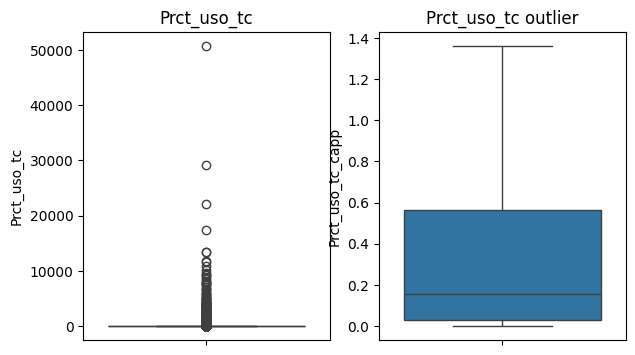

Edad


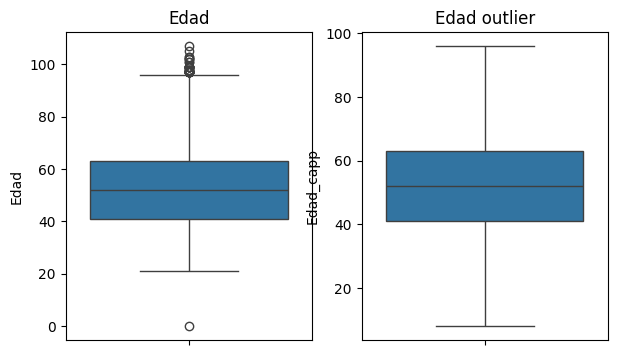

Prct_deuda_vs_ingresos


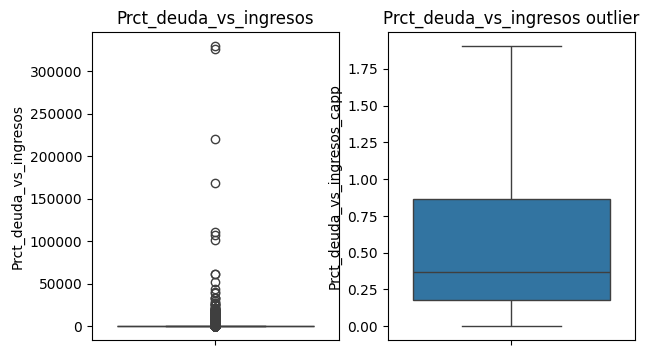

Mto_ingreso_mensual


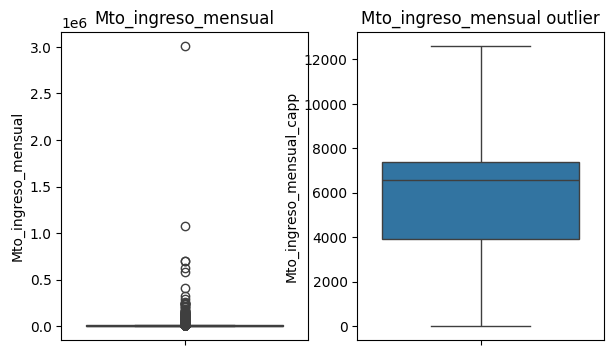

Nro_prod_financieros_deuda


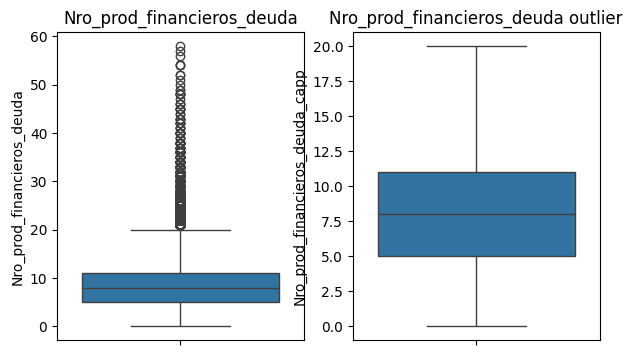

In [138]:
continuas_outliers=continuas

for col in continuas_outliers:

    IQR=dataset[col].quantile(0.75)-dataset[col].quantile(0.25)
    IQR
    LL=dataset[col].quantile(0.25)-1.5*IQR
    UL=dataset[col].quantile(0.75)+1.5*IQR

    dataset[col+'_capp']=np.where(dataset[col]>UL,UL,np.where(dataset[col]<LL,LL,dataset[col]))
    
    print(col)

    plt.figure(figsize=(7,4))

    plt.subplot(121)
    plt.title(col)
    sns.boxplot(y=dataset[col])

    plt.subplot(122)
    plt.title(col + ' outlier')
    sns.boxplot(y=dataset[col+'_capp'])
 
   
    plt.show()

In [139]:
dataset['Prct_uso_tc'] = dataset['Prct_uso_tc_capp']
dataset['Edad'] = dataset['Edad_capp']
dataset['Prct_deuda_vs_ingresos'] = dataset['Prct_deuda_vs_ingresos_capp']
dataset['Mto_ingreso_mensual'] = dataset['Mto_ingreso_mensual_capp']
dataset['Nro_prod_financieros_deuda'] = dataset['Nro_prod_financieros_deuda_capp']


In [140]:
dataset=dataset.drop(['Prct_uso_tc_capp'], axis=1)
dataset=dataset.drop(['Edad_capp'], axis=1)
dataset=dataset.drop(['Prct_deuda_vs_ingresos_capp'], axis=1)
dataset=dataset.drop(['Mto_ingreso_mensual_capp'], axis=1)
dataset=dataset.drop(['Nro_prod_financieros_deuda_capp'], axis=1)

In [141]:
dataset.head()

,Default,Prct_uso_tc,Edad,Nro_prestao_retrasados,Prct_deuda_vs_ingresos,Mto_ingreso_mensual,Nro_prod_financieros_deuda,Nro_retraso_60dias,Nro_creditos_hipotecarios,Nro_retraso_ultm3anios,Nro_dependiente
0,1,0.766127,45.0,2,0.802982,9120.00,13.0,0,6,0,2
1,0,0.957151,40.0,0,0.121876,2600.00,4.0,0,0,0,1
2,0,0.658180,38.0,1,0.085113,3042.00,2.0,1,0,0,0
3,0,0.233810,30.0,0,0.036050,3300.00,5.0,0,0,0,0
4,0,0.907239,49.0,1,0.024926,12598.25,7.0,0,1,0,0


In [142]:
dataset.head()

,Default,Prct_uso_tc,Edad,Nro_prestao_retrasados,Prct_deuda_vs_ingresos,Mto_ingreso_mensual,Nro_prod_financieros_deuda,Nro_retraso_60dias,Nro_creditos_hipotecarios,Nro_retraso_ultm3anios,Nro_dependiente
0,1,0.766127,45.0,2,0.802982,9120.00,13.0,0,6,0,2
1,0,0.957151,40.0,0,0.121876,2600.00,4.0,0,0,0,1
2,0,0.658180,38.0,1,0.085113,3042.00,2.0,1,0,0,0
3,0,0.233810,30.0,0,0.036050,3300.00,5.0,0,0,0,0
4,0,0.907239,49.0,1,0.024926,12598.25,7.0,0,1,0,0


In [143]:
dataset.to_csv('../data/processed/dataset_for_model.csv', index=False)